# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Pada project ini, akan dilakukan scrapping terhadap data exchange-rate yaitu data kurs US Dollar ke rupiah selama 6 bulan terakhir dari https://www.exchange-rates.org/history/IDR/USD/T. Data yang akan discrapp yaitu data tanggal dan nilai harga harian (harga 1 dolar dalam rupiah).

Output dari project ini adalah berhasil melakukan web scrapping dan melakukan analisis terhadap data yang diperoleh.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [18]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Mencari right key diawali dengan cara data yang akan diambil pada web di Inspect terlebih dahulu. Kemudian dicari right key yang menunjukkan datanya. 

Right Key untuk data ini : ('table', attrs={'class':'history-rates-data'})

In [4]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-05-12">
     May 12, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-05-12">
     2023-5-12
    </a>
   </td>
   <td>
    <span class="w">
     <span class="now


Finding row length.

In [5]:
# cek row length dr date/harga
table_all = table.find_all('span', attrs={'class':'w'})
table_all
row_length = len(table_all)
row_length

130

In [6]:
#ekstrak satu nilai baris pd kolom tertentu
#kalau mau ambil semua berarti pakai looping
#begitu juga dg kolom lain
#date
table.find_all('a', attrs={'class':'w'})[0].text

'May 12, 2023'

In [7]:
#harga harian
table.find_all('span', attrs={'class':'w'})[0].text

'$1 = Rp14,844'

Proses Looping

Pada cell sebelumnya telah diketahui bahwa jumlah data (row_length) yaitu 130 baris yang terdiri atas data tanggal dan data harga harian.

Looping dilakukan untuk mengambil data tersebut dari baris 1 sampai baris 130.

- Data Tanggal diambil menggunakan fungsi find_all --> table.find_all('a', attrs={'class':'w'})[0].text
- Data Harga Harian menggunakan fungsi find_all --> table.find_all('span', attrs={'class':'w'})[0].text

In [9]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get date
    date=table.find_all('a', attrs={'class':'w'})[i].text
    
    #get harga harian
    harga=table.find_all('span', attrs={'class':'w'})[i].text
    
    temp.append((date,harga))
    
temp #temp yaitu list yang terdiri atas Data Tanggal dan Data Harga Harian

[('May 12, 2023', '$1 = Rp14,844'),
 ('May 11, 2023', '$1 = Rp14,776'),
 ('May 10, 2023', '$1 = Rp14,698'),
 ('May 9, 2023', '$1 = Rp14,776'),
 ('May 8, 2023', '$1 = Rp14,744'),
 ('May 5, 2023', '$1 = Rp14,675'),
 ('May 4, 2023', '$1 = Rp14,699'),
 ('May 3, 2023', '$1 = Rp14,680'),
 ('May 2, 2023', '$1 = Rp14,747'),
 ('May 1, 2023', '$1 = Rp14,677'),
 ('April 28, 2023', '$1 = Rp14,674'),
 ('April 27, 2023', '$1 = Rp14,691'),
 ('April 26, 2023', '$1 = Rp14,841'),
 ('April 25, 2023', '$1 = Rp14,940'),
 ('April 24, 2023', '$1 = Rp14,934'),
 ('April 21, 2023', '$1 = Rp14,936'),
 ('April 20, 2023', '$1 = Rp14,954'),
 ('April 19, 2023', '$1 = Rp14,995'),
 ('April 18, 2023', '$1 = Rp14,889'),
 ('April 17, 2023', '$1 = Rp14,850'),
 ('April 14, 2023', '$1 = Rp14,782'),
 ('April 13, 2023', '$1 = Rp14,722'),
 ('April 12, 2023', '$1 = Rp14,835'),
 ('April 11, 2023', '$1 = Rp14,915'),
 ('April 10, 2023', '$1 = Rp14,950'),
 ('April 7, 2023', '$1 = Rp14,941'),
 ('April 6, 2023', '$1 = Rp14,931'),
 ('

## Creating data frame & Data wrangling

Simpan data ke dalam dataframe df

In [11]:
import pandas as pd

In [45]:
df = pd.DataFrame(temp,columns=('Date','Price'))
df

,Date,Price
0,"May 12, 2023","$1 = Rp14,844"
1,"May 11, 2023","$1 = Rp14,776"
2,"May 10, 2023","$1 = Rp14,698"
3,"May 9, 2023","$1 = Rp14,776"
4,"May 8, 2023","$1 = Rp14,744"
...,...,...
125,"November 18, 2022","$1 = Rp15,641"
126,"November 17, 2022","$1 = Rp15,714"
127,"November 16, 2022","$1 = Rp15,639"
128,"November 15, 2022","$1 = Rp15,557"


In [46]:
df.dtypes

Date     object
Price    object
dtype: object

### Data Wrangling

Perhatikan bahwa, tipe data Date dan Price masih dalam bentuk object sehingga kita harus melakukan pengubahan tipe data yang sesuai.
Selain itu, Data Harga juga harus dihapus terlebih dahulu '$1 = Rp' agar data hanya berisi angka saja dan bisa diubah ke tipe float.

In [47]:
#mengganti $1 = Rp menjadi blank dan koma (,) menjadi blank
df['Price']=df['Price'].str.replace('$1 = Rp','').str.replace(',','')
df

,Date,Price
0,"May 12, 2023",14844
1,"May 11, 2023",14776
2,"May 10, 2023",14698
3,"May 9, 2023",14776
4,"May 8, 2023",14744
...,...,...
125,"November 18, 2022",15641
126,"November 17, 2022",15714
127,"November 16, 2022",15639
128,"November 15, 2022",15557


Selanjutnya, kita ubah tipe data Tanggal menjadi datetime64[ns] dan data Harga menjadi float64 menggunakan fungsi astype.

In [48]:
df['Date']=df['Date'].astype('datetime64[ns]')
df['Price']=df['Price'].astype('float64')

In [49]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion



### Data Visualization

Data Exhange-Rate merupakan data time series atau data pergerakan terhadap waktu sehingga kita akan melakukan visualisasi menggunakan line plot.
Sebelum itu, jadikan kolom Date sebagai index terlebih dahulu.

In [50]:
df1=df.set_index('Date')

In [51]:
df1

,Price
Date,
2023-05-12,14844.0
2023-05-11,14776.0
2023-05-10,14698.0
2023-05-09,14776.0
2023-05-08,14744.0
...,...
2022-11-18,15641.0
2022-11-17,15714.0
2022-11-16,15639.0


<Axes: xlabel='Date'>

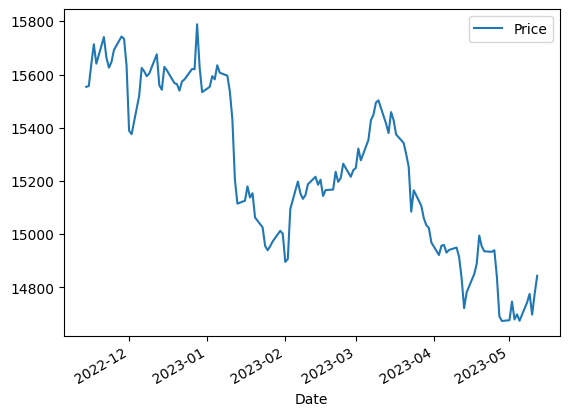

In [52]:
#line plot
df1.plot()

In [96]:
#nilai maksimum rupiah terhadap dollar
maks= df['Price'].max()
maks

15789.0

In [97]:
df[df['Price']== maks]

,Date,Price
97,2022-12-28,15789.0


In [82]:
#nilai minimum rupiah terhadap dollar
minim= df['Price'].min()
minim

14674.0

In [98]:
df[df['Price']== minim]

,Date,Price
10,2023-04-28,14674.0


In [99]:
#rata-rata harga rupiah terhadap dollar
df['Price'].mean()

15240.876923076923

### Analisa

- Nilai Tukar Dollar terhadap Rupiah cenderung memiliki tren menurun selama 6 bulan terakhir. Pada bulan Januari ke Februari mengalami penurunan sedangkan bulan Februari ke Maret naik lagi lalu turun lagi sampai Mei.
- Nilai Tukar Dollar terhadap Rupiah tertinggi yaitu terjadi pada 28 Desember 2022 sebesar Rp15.789
- Nilai Tukar Dollar terhadap Rupiah terendah yaitu terjadi pada 28 April 2023 sebesar Rp14.674
- Rata-rata Nilai Tukar Dollar terhadap Rupiah yaitu Rp15.240,87

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.